# Historical Fires 

## Data

The Historical Fires Boundaries dataset was produced under Stream 1 - Work Package 4 of the 2021-23 Australian Research Data Commons (ARDC) Bushfire Data Challenge Project; a collaborative partnership between the ARDC, Geoscience Australia, and the Emergency Management Spatial Information Network. 

Data were retrieved from the custodian using a webservice in ESRI GeoDatabase format, converted into ESRI Shapefile, and loaded into a PostgreSQL database.


## Thinness Ratio

Thinness is typically used to define the regularity of an object. Having computed the area (A) and perimeter (P) of an object, we can define the thinness ratio as 4 * PI * (Area / Perimeter ^ 2) 

This measure takes a maximum value of 1 for a circle. Objects of regular shape have a higher thinness ratio than similar irregular ones.

In [1]:
library(pivottabler)
library(IRdisplay)

hf.df <- read.csv('./data/historic_fires/historic_fires.csv')

states<- c('QLD (Queensland)', 'VIC (Victoria)', 'WA (Western Australia)', 'ACT (Australian Capital Territory)', 'SA (South Australia)', 'NSW (New South Wales)',  'TAS (Tasmania)')
firetypes <- c('Bushfire', 'Prescribed Burn')


In [ ]:
aggrNFires <- function (x, attrvalue) {
  type.df <- subset(x, fire_type == attrvalue)
  type.aggr <- aggregate(type.df$gid, list(type.df$year), FUN=length)
  plot(type.aggr$Group.1, type.aggr$x, main=attrvalue, cex=0.2, 
       ylab='N. of fires', xlab='Year', xlim=c(1899, 2022), ylim=c(0, 15000))
}

aggrNFiresResidual <- function (x) {
  type.df <- subset(x, fire_type != firetypes[1] & fire_type != firetypes[2])
  type.aggr <- aggregate(type.df$gid, list(type.df$year), FUN=length)
  plot(type.aggr$Group.1, type.aggr$x, main='Uncertain Cause', cex=0.2, 
       ylab='N. of fires', xlab='Year', xlim=c(1899, 2022), ylim=c(0, 5000))
}

aggrArea <- function (x, attrvalue) {
  type.df <- subset(x, fire_type == attrvalue)
  type.aggr <- aggregate(type.df$area_comp / 1000000, list(type.df$year), FUN=sum)
  plot(type.aggr$Group.1, type.aggr$x, main=attrvalue, cex=0.2, 
       ylab='Sum of Area (sqkm)', xlab='Year', xlim=c(1899, 2022), ylim=c(0, 170000))
}

aggrMeanArea <- function (x, attrvalue) {
  type.df <- subset(x, fire_type == attrvalue)
  type.aggr <- aggregate(type.df$area_comp / 1000000, list(type.df$year), FUN=mean)
  plot(type.aggr$Group.1, type.aggr$x, main=attrvalue, cex=0.2, 
       ylab='Mean Area (sqkm)', xlab='Year', xlim=c(1899, 2022), ylim=c(0, 25))
}

aggrTR <- function (x, attrvalue) {
  type.df <- subset(x, fire_type == attrvalue)
  type.aggr <- aggregate(type.df$thinness_ratio, list(type.df$year), FUN=mean)
  plot(type.aggr$Group.1, type.aggr$x, main=attrvalue, cex=0.2, 
       ylab='Mean Thinness Ratio', xlab='Year', xlim=c(1899, 2022), ylim=c(0, 1))
}

aggrMeanAreaState <- function (x, attrvalue, statevalue) {
  type.df <- subset(x, fire_type == attrvalue & state == statevalue)
  type.aggr <- aggregate(type.df$area_comp / 1000000, list(type.df$year), FUN=mean)
  plot(type.aggr$Group.1, type.aggr$x, main=attrvalue, sub=statevalue, cex=0.2, 
       ylab='Mean Area (sqkm)', xlab='Year', xlim=c(1899, 2022), ylim=c(0, 25))
}

aggrTRState <- function (x, attrvalue, statevalue) {
  type.df <- subset(x, fire_type == attrvalue & state == statevalue)
  type.aggr <- aggregate(type.df$thinness_ratio, list(type.df$year), FUN=mean)
  plot(type.aggr$Group.1, type.aggr$x, main=attrvalue, sub=statevalue, cex=0.2, 
       ylab='Mean Thinness Ratio', xlab='Year', xlim=c(1899, 2022), ylim=c(0, 1))
}

display_markdown('## Fire type statistics by year')

par(mfrow=c(4,2))
for (firetype in firetypes) {
  aggrNFires(hf.df, firetype)
}
for (firetype in firetypes) {
  aggrArea(hf.df, firetype)
}
for (firetype in firetypes) {
  aggrMeanArea(hf.df, firetype)
}
for (firetype in firetypes) {
  aggrTR(hf.df, firetype)
}



## N. of fires of uncertain origin by year

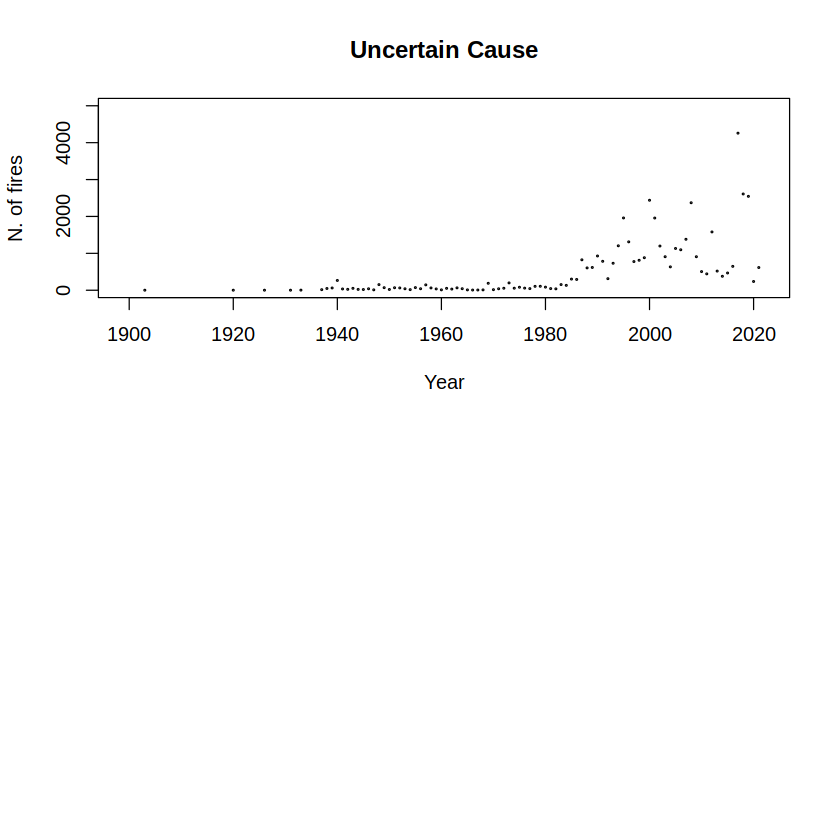

In [19]:
pt <- PivotTable$new()
pt$addData(hf.df)
#pt$addRowDataGroups("year", totalCaption="All years")
pt$addRowDataGroups("fire_type", totalCaption="All fire types")
pt$addRowDataGroups("state", totalCaption="All states")
#pt$addRowDataGroups("capt_metho", totalCaption="ALl capture methods")
pt$defineCalculation(calculationName="FN", caption="N.of fires", 
                     summariseExpression="n()")
pt$defineCalculation(calculationName="A", caption="Sum area (sqkm)", 
                     summariseExpression="sum(area_comp / 1000000, na.rm=TRUE)", format="%.3f")
pt$defineCalculation(calculationName="MA", caption="Median area (sqkm)", 
                     summariseExpression="median(area_comp / 1000000, na.rm=TRUE)", format="%.3f")
pt$defineCalculation(calculationName="TR", caption="Thinness Ratio", 
                     summariseExpression="median(thinness_ratio, na.rm=TRUE)", format="%.3f")
pt$evaluatePivot()

display_markdown('## N. of fires of uncertain origin by year')
par(mfrow=c(2,1))
aggrNFiresResidual(hf.df)


In [20]:
corAreaTR <- function (x, attrvalue) {
  type.df <- subset(x, fire_type == attrvalue) 
  cor(type.df$area_comp, type.df$thinness_ratio, use='complete.obs')  
}

for (firetype in c(firetypes[1], firetypes[2])) {
  display_markdown(paste('Correlation of Thinness Ratio with burnt are for', firetype))
  display_markdown(corAreaTR(hf.df, firetype))
}


Correlation of Thinness Ratio with burnt are for Bushfire

Correlation of Thinness Ratio with burnt are for Prescribed Burn

## Fire type statistics for the entire country

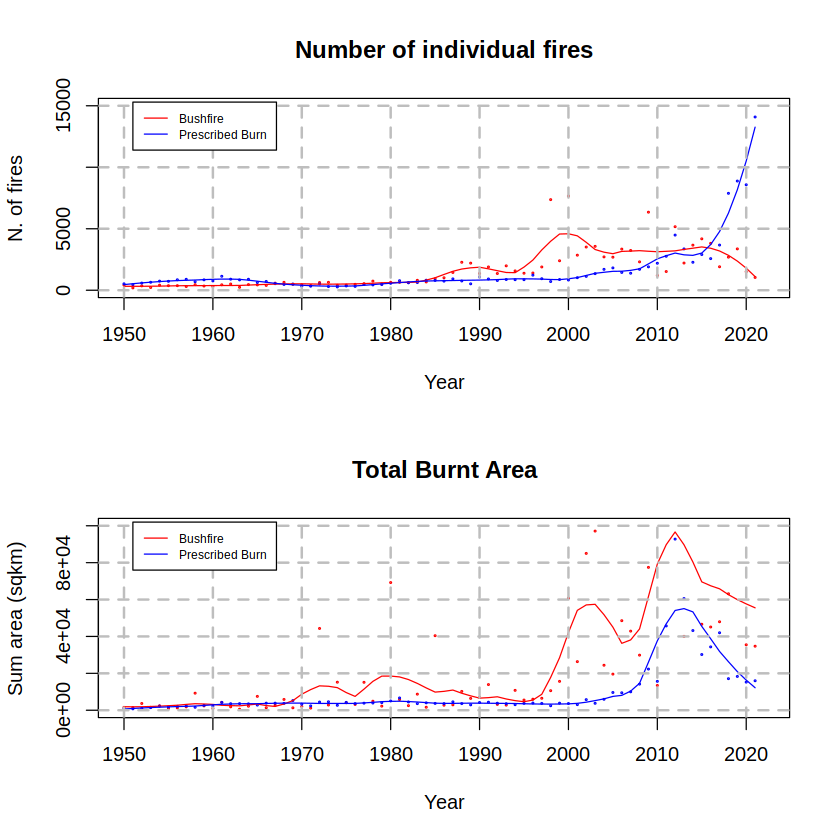

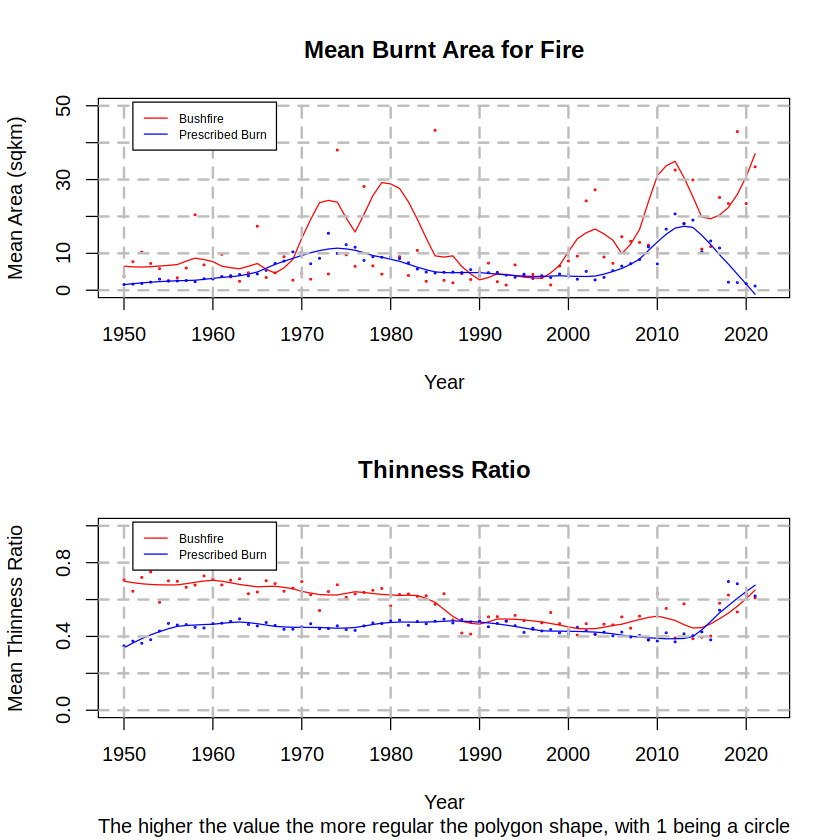

In [4]:
plotAggr <- function (aggr1, aggr2, title, subtitle, ylab, ylim, legend_flag=TRUE) {
  
  plot(aggr1$Group.1, aggr1$x, main=title, sub=subtitle, cex=0.2, 
       ylab=ylab, xlab='Year', xlim=c(1950, 2022), ylim=ylim, col='red')
  
  points(aggr2$Group.1, aggr2$x, cex=0.2, col='blue')
  lines(predict(loess(x ~ Group.1, data=aggr1, span=0.2)), x=aggr1$Group.1, col='red')
  lines(predict(loess(x ~ Group.1, data=aggr2, span=0.2)), x=aggr2$Group.1, col='blue')
  grid(nx = NULL, ny = NULL, lty = 2, col = "gray", lwd = 2)
  if (legend_flag == TRUE) {
    legend(1951, ylim[2] * 1.02, legend=c(firetypes[1], firetypes[2]), col=c('red', 'blue'), lty=1, cex=0.6)    
  }
} 

bf.df <- subset(hf.df, fire_type == firetypes[1] & year > 1949 & year < 2022) 
pb.df <- subset(hf.df, fire_type == firetypes[2] & year > 1949 & year < 2022) 

par(mfrow=c(2, 1))

plotAggr(aggregate(bf.df$gid, list(bf.df$year), FUN=length), 
        aggregate(pb.df$gid, list(pb.df$year), FUN=length), 
        'Number of individual fires', '', 'N. of fires', c(0, 15000))
plotAggr(aggregate(bf.df$area_comp / 1000000, list(bf.df$year), FUN=sum), 
        aggregate(pb.df$area_comp / 1000000, list(pb.df$year), FUN=sum), 
        'Total Burnt Area', '', 'Sum area (sqkm)', c(0, 100000))

display_markdown('## Fire type statistics for the entire country')
par(mfrow=c(2, 1))
plotAggr(aggregate(bf.df$area_comp / 1000000, list(bf.df$year), FUN=mean), 
        aggregate(pb.df$area_comp / 1000000, list(pb.df$year), FUN=mean), 
        'Mean Burnt Area for Fire', '', 'Mean Area (sqkm)', c(0, 50))
plotAggr(aggregate(bf.df$thinness_ratio, list(bf.df$year), FUN=mean), 
        aggregate(pb.df$thinness_ratio, list(pb.df$year), FUN=mean), 
        'Thinness Ratio', 
        'The higher the value the more regular the polygon shape, with 1 being a circle', 
        'Mean Thinness Ratio', c(0, 1))


## Total burnt area by state

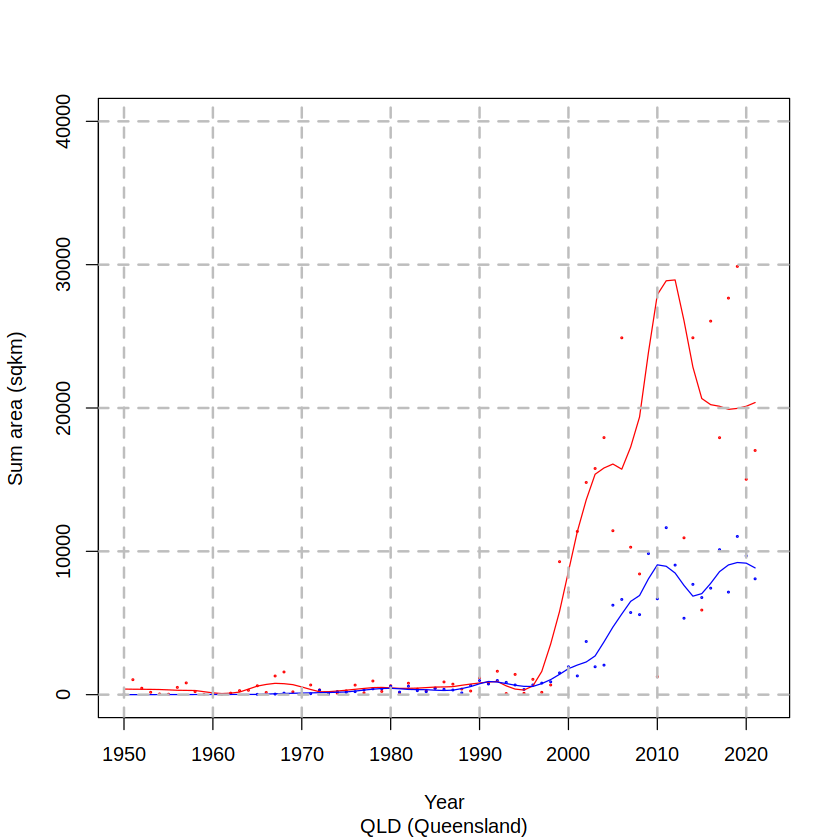

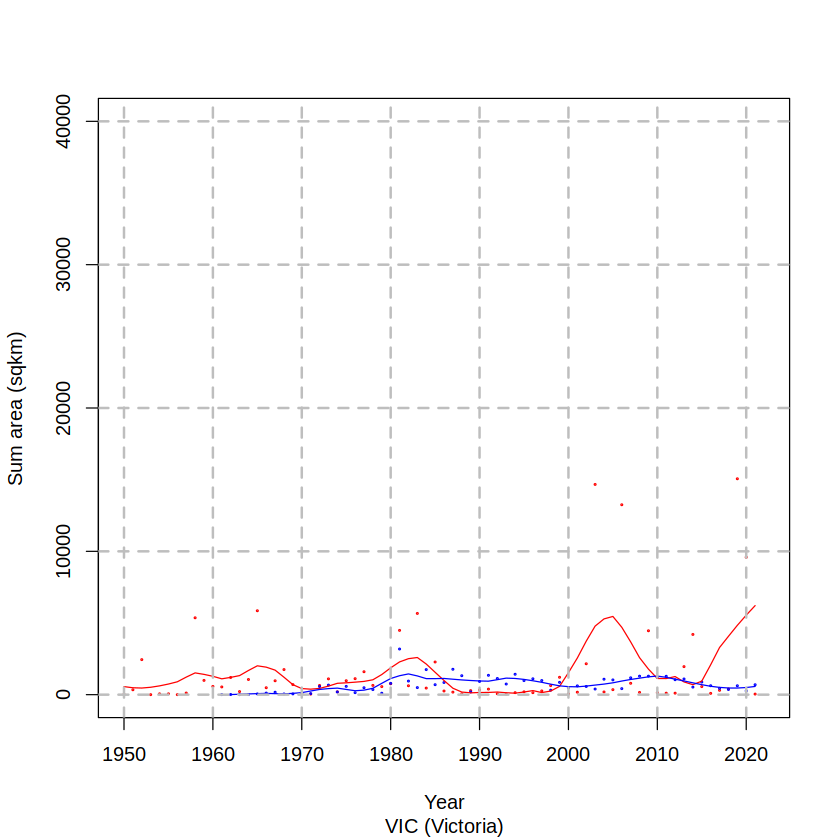

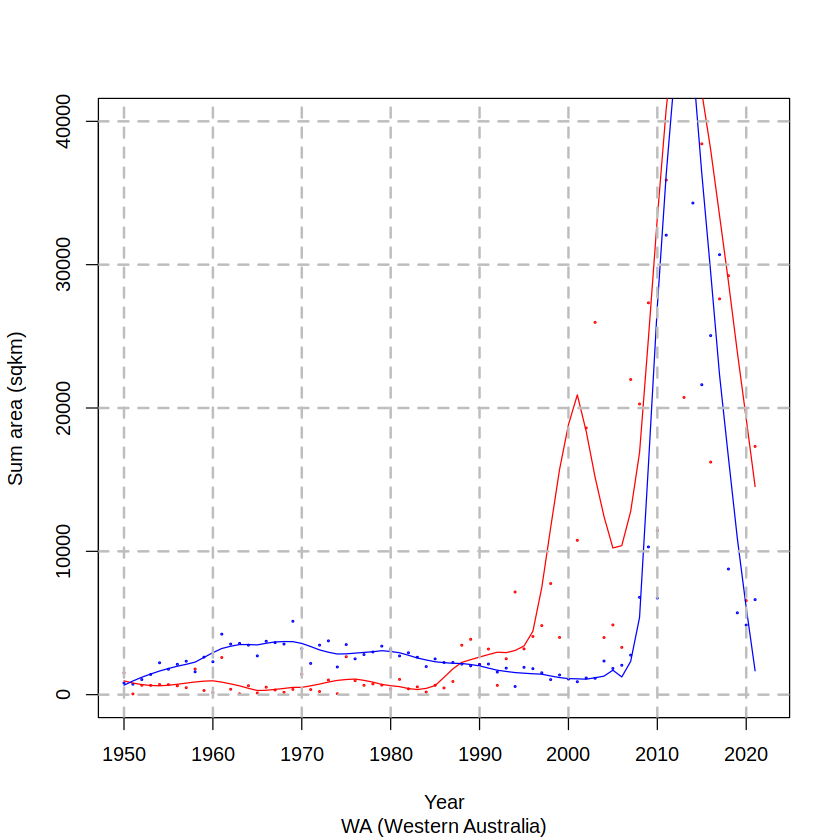

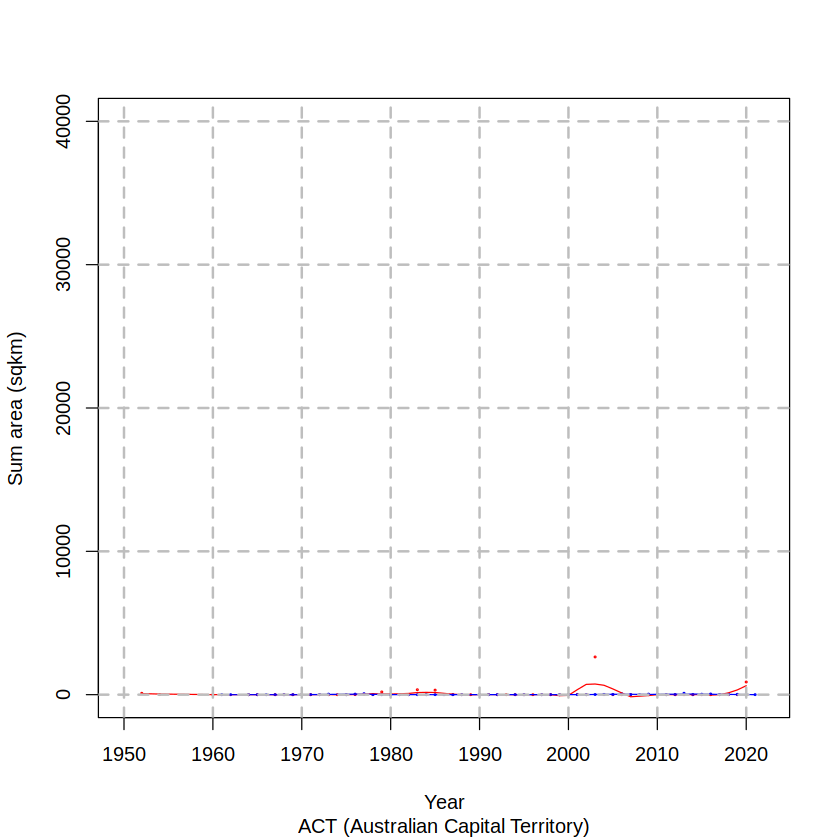

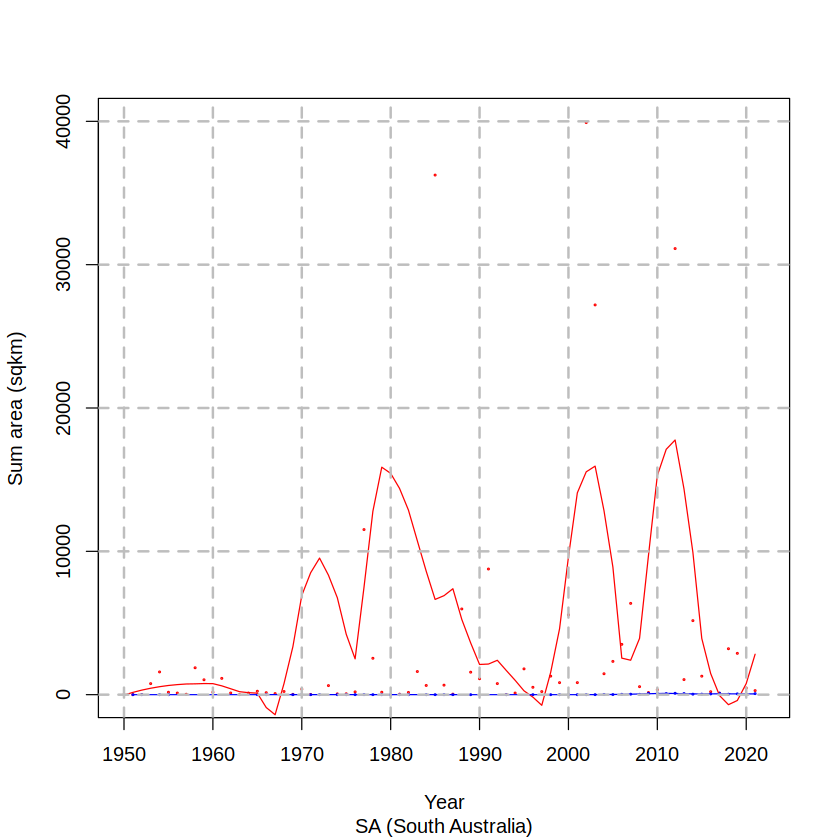

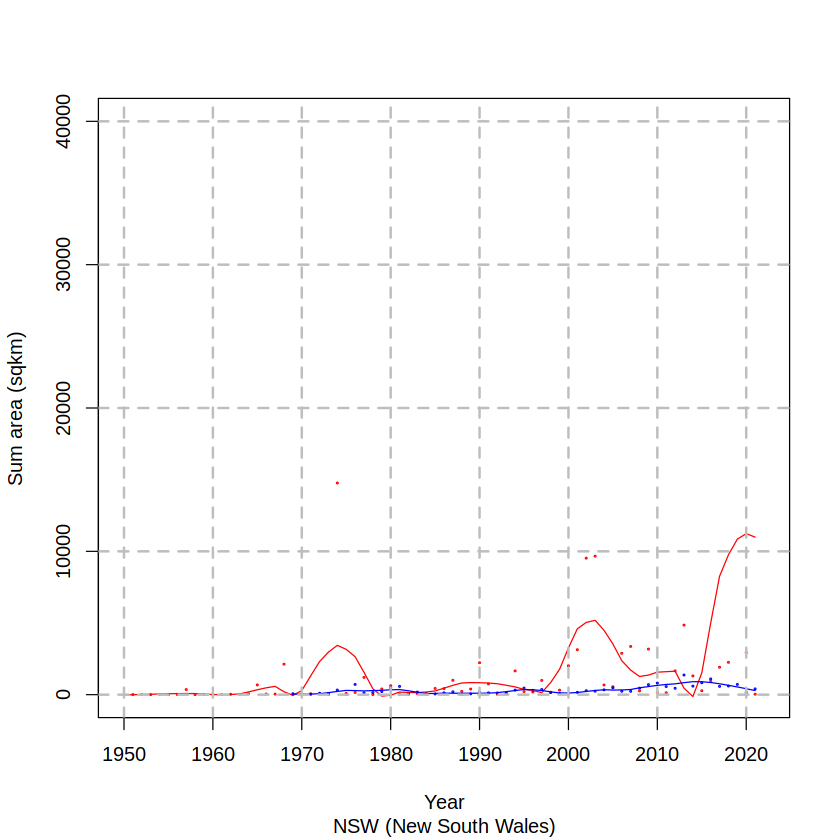

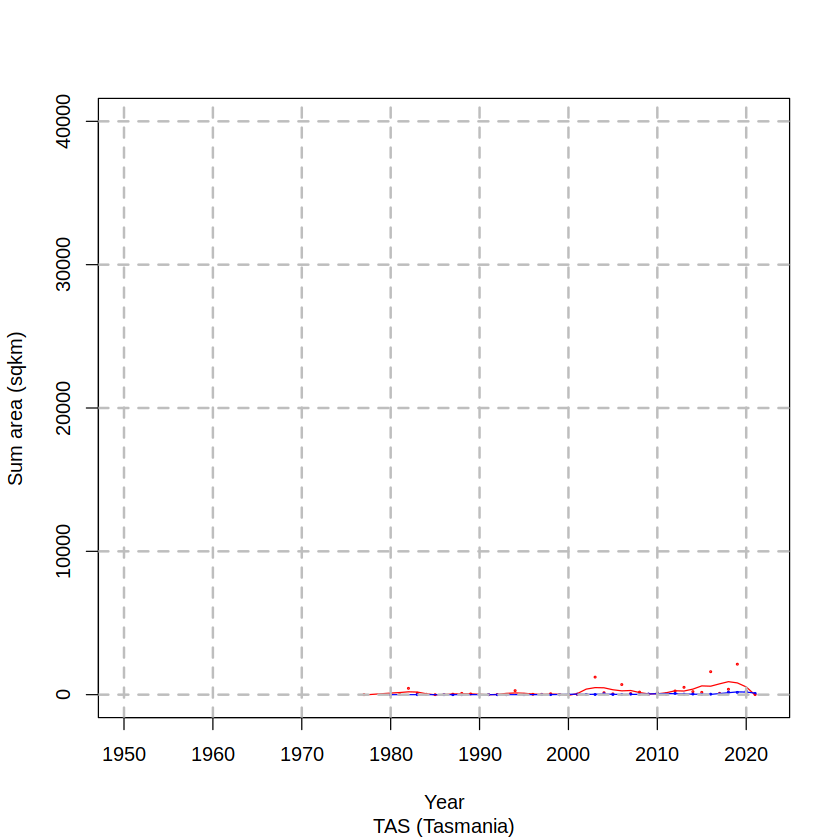

In [31]:
display_markdown('## Total burnt area by state')
for (state_in in states) {
#  par(mfrow=c(2, 1))
  bfs.df <- subset(bf.df, state == state_in)
  pbs.df <- subset(pb.df, state == state_in)
  plotAggr(aggregate(bfs.df$area_comp / 1000000, list(bfs.df$year), FUN=sum), 
        aggregate(pbs.df$area_comp / 1000000, list(pbs.df$year), FUN=sum), 
        '', state_in, 'Sum area (sqkm)', c(0, 40000), 
        FALSE)
}

## Thinness Ratio by state

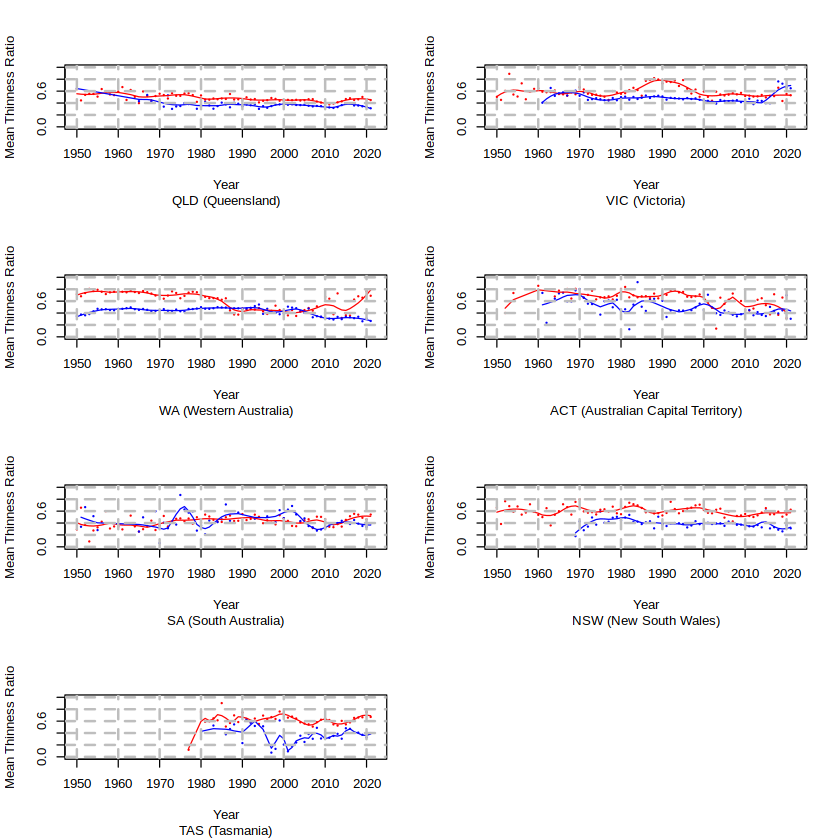

In [23]:
display_markdown('## Thinness Ratio by state')
par(mfrow=c(4, 2))

for (state_in in states) {
  bfs.df <- subset(bf.df, state == state_in)
  pbs.df <- subset(pb.df, state == state_in)
  plotAggr(aggregate(bfs.df$thinness_ratio, list(bfs.df$year), FUN=mean), 
        aggregate(pbs.df$thinness_ratio, list(pbs.df$year), FUN=mean), 
        '', state_in, 'Mean Thinness Ratio', c(0, 1),
          FALSE)
}